In [54]:
import pandas as pd
df = pd.read_csv('data/TOS Kaggle data week ending 2022 09 30.csv')
# https://www.kaggle.com/code/kerneler/starter-intraday-market-data-2045eb56-3

In [55]:
df

,ID,TimeStamp,/ES,/NQ,/RTY,SPY,QQQ,IWM,AAPL,MSFT,...,XLF,XLP,XLY,XTN,HYG,/ES SMA20,/ES SMA50,/ES volume,TLT,TLT volume
0,13262914,2022-09-25 17:59:09.000,3711.50,11388.00,1687.6,367.95,275.51,167.31,150.43,237.92,...,31.05,69.38,146.42,64.49,72.13,36.97,36.12,0,105.70,23042230.0
1,13262915,2022-09-25 17:59:12.000,3711.50,11388.00,1687.6,367.95,275.51,167.31,150.43,237.92,...,31.05,69.38,146.42,64.49,72.13,36.97,36.12,0,105.70,0.0
2,13262916,2022-09-25 17:59:15.000,3711.50,11388.00,1687.6,367.95,275.51,167.31,150.43,237.92,...,31.05,69.38,146.42,64.49,72.13,36.97,36.12,0,105.70,0.0
3,13262917,2022-09-25 17:59:18.000,3711.50,11388.00,1687.6,367.95,275.51,167.31,150.43,237.92,...,31.05,69.38,146.42,64.49,72.13,36.97,36.12,0,105.70,0.0
4,13262918,2022-09-25 17:59:21.000,3711.50,11388.00,1687.6,367.95,275.51,167.31,150.43,237.92,...,31.05,69.38,146.42,64.49,72.13,36.97,36.12,0,105.70,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143706,13406620,2022-09-30 18:00:45.000,3604.25,11058.25,1670.3,357.18,267.26,164.92,138.20,232.90,...,30.36,66.73,142.45,63.61,71.39,38.04,37.65,0,102.45,0.0
143707,13406621,2022-09-30 18:00:48.000,3604.25,11058.25,1670.3,357.18,267.26,164.92,138.20,232.90,...,30.36,66.73,142.45,63.61,71.39,38.04,37.65,0,102.45,0.0
143708,13406622,2022-09-30 18:00:51.000,3604.25,11058.25,1670.3,357.18,267.26,164.92,138.20,232.90,...,30.36,66.73,142.45,63.61,71.39,38.04,37.65,0,102.45,0.0
143709,13406623,2022-09-30 18:00:54.000,3604.25,11058.25,1670.3,357.18,267.26,164.92,138.20,232.90,...,30.36,66.73,142.45,63.61,71.39,38.04,37.65,0,102.45,0.0


In [56]:
df.columns

Index(['ID', 'TimeStamp', '/ES', '/NQ', '/RTY', 'SPY', 'QQQ', 'IWM', 'AAPL',
       'MSFT', 'NVDA', 'XLK', 'XLF', 'XLP', 'XLY', 'XTN', 'HYG', '/ES SMA20',
       '/ES SMA50', '/ES volume', 'TLT', 'TLT volume'],
      dtype='object')

In [57]:
df['TimeStamp'] =  pd.to_datetime(df['TimeStamp'])

In [58]:
len(df)

143711

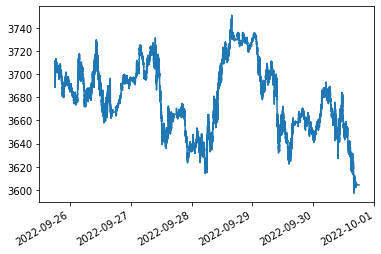

In [59]:
import matplotlib.pyplot as plt
plt.plot(df['TimeStamp'],df['/ES'])
plt.gcf().autofmt_xdate()
plt.show()

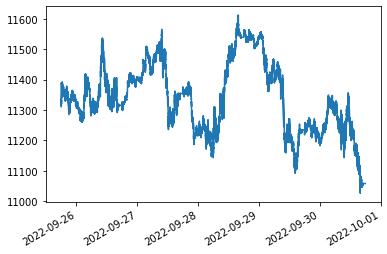

In [60]:
import matplotlib.pyplot as plt
plt.plot(df['TimeStamp'],df['/NQ'])
plt.gcf().autofmt_xdate()
plt.show()

In [61]:
df['TimeStamp'].iloc[1] - df['TimeStamp'].iloc[0]

Timedelta('0 days 00:00:03')

In [62]:
from scipy.fft import fft, fftfreq
yf = fft(df['/NQ'].values)

In [63]:
SAMPLE_RATE = 0.5 # Hertz [20 samples per minute, 1 sample each 3 seconds]
DURATION = len(df)/SAMPLE_RATE  # Seconds
N = int(SAMPLE_RATE * DURATION)
xf = fftfreq(N, 1 / SAMPLE_RATE)

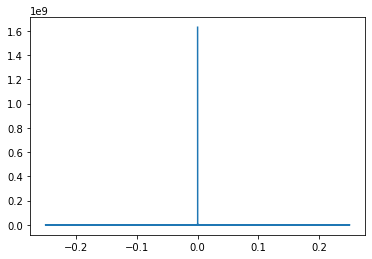

In [64]:
import numpy as np
plt.plot(xf, np.abs(yf))
plt.show()

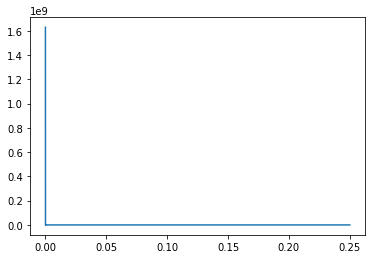

In [65]:
from scipy.fft import rfft, rfftfreq
# Note the extra 'r' at the front
yf = rfft(df['/NQ'].values)
xf = rfftfreq(N, 1 / SAMPLE_RATE)
plt.plot(xf, np.abs(yf))
plt.show()